# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


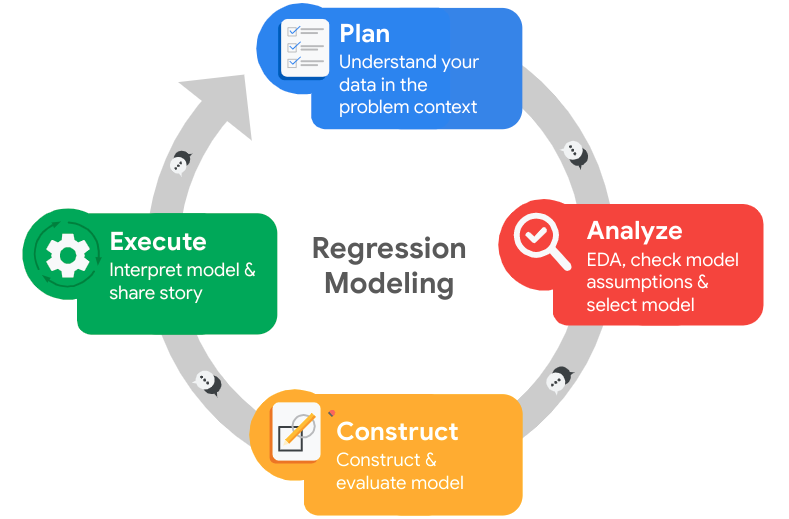

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
    - HR department, Senior leadership Team

- What are you trying to solve or accomplish?
    - predicts the underlying drivers that contributes to the employee turnover
    
- What are your initial observations when you explore the data?
    - Most of the variables in the survey data align with prediction variables but certain variables can be engineered for effective predictions

- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
    - Resources need to achieve the objective includes the python packages for operations, visualization, modelling packages

- Do you have any ethical considerations in this stage?
    - Consider the bias in the recorded data during the analysis and while presenting the results

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
!python3 -m pip install --upgrade pip
!pip install --upgrade scikit-learn

     |████████████████████████████████| 2.1 MB 39.4 MB/s            
  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
      Successfully uninstalled pip-21.3.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 108.7 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [2]:
# Import packages
# Operational Packages
import numpy as np
import pandas as pd
import pickle 

# Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling packages
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#XGBoost
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

# Modelling evaluation and metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
pd.set_option('display.max_columns', None)
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [5]:
# Gather descriptive statistics about the data
df0.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# Rename columns as needed
df = df0.copy()
df = df0.rename(columns={'satisfaction_level':'satisfaction',
                          'last_evaluation':'last_eval',
                          'number_project':'#_projects',
                          'average_montly_hours':'avg_mon_hrs',
                          'time_spend_company':'tenure',
                          'Work_accident':'work_accident',
                          'promotion_last_5years':'promotion_<5yrs',
                         'Department':'department'
                         })


# Display all column names after the update
df.columns

Index(['satisfaction', 'last_eval', '#_projects', 'avg_mon_hrs', 'tenure',
       'work_accident', 'left', 'promotion_<5yrs', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [8]:
# Check for missing values
df.isnull().sum()

satisfaction       0
last_eval          0
#_projects         0
avg_mon_hrs        0
tenure             0
work_accident      0
left               0
promotion_<5yrs    0
department         0
salary             0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [9]:
# Check for duplicates
df.duplicated().sum()

3008

In [10]:
# Inspect some rows containing duplicates as needed
df[df.duplicated()].head()

,satisfaction,last_eval,#_projects,avg_mon_hrs,tenure,work_accident,left,promotion_<5yrs,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [11]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df1.head()

,satisfaction,last_eval,#_projects,avg_mon_hrs,tenure,work_accident,left,promotion_<5yrs,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

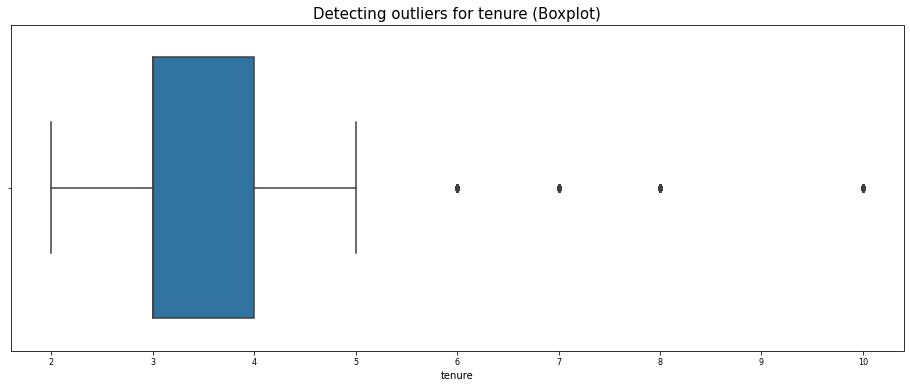

In [12]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(16,6))
plt.title('Detecting outliers for tenure (Boxplot)', fontsize=15)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
sns.boxplot(x=df1['tenure'])
plt.show()

In [13]:
# Determine the number of rows containing outliers

# 25th Percentile for tenure
percentile25 = df1['tenure'].quantile(0.25)

# 75th Percentile for tenure
percentile75 = df1['tenure'].quantile(0.75)

# IQR - Inter Quartile Range
iqr = percentile75 - percentile25

# Limits of the tenure
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print('Lower limit:', lower_limit)
print('Upper limit:', upper_limit)

# Identifying the outliers in 'tenure'
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# print the rows containing the outliers
print(f'Number of rows containing outliers in tenure:', len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows containing outliers in tenure: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [14]:
# Get numbers of people who left vs. stayed
print(df['left'].value_counts())
print()
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df['left'].value_counts(normalize=True))

0    11428
1     3571
Name: left, dtype: int64

0    0.761917
1    0.238083
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [15]:
df.head()

,satisfaction,last_eval,#_projects,avg_mon_hrs,tenure,work_accident,left,promotion_<5yrs,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


What all relationships are interesting to investigate? 
- Correlation heatmaps
- Tenure vs satisfaction; tenure vs left distribution; 
- #_project vs avg_mon_hrs; distribution of #_projects
- satisfaction vs salary; satisfaction vs avg_mon_hrs
- avg_mon_hrs vs last_eval; avg_mon_hrs vs promotion_<5yrs
- distribution of left; 

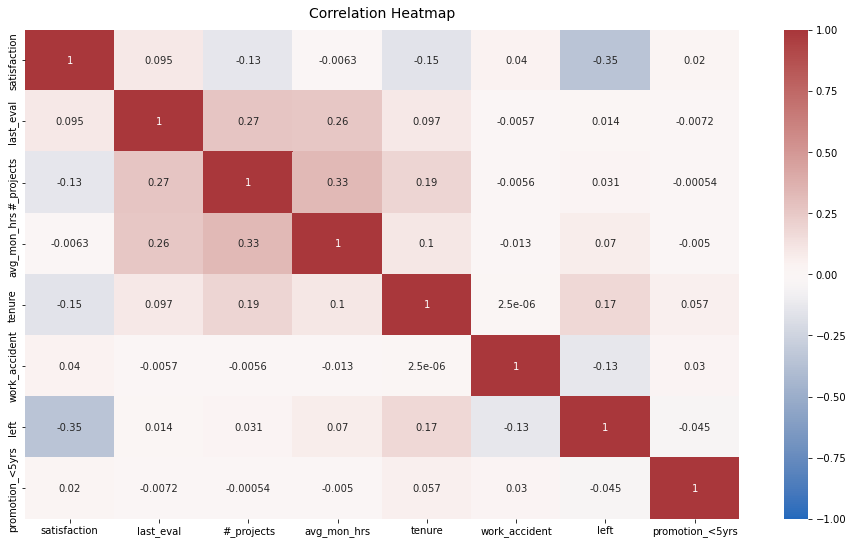

In [16]:
# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

Correlation heatmap,
- Number of projects, average monthly hours, and evaluation scores all have the highest positive correlation with each other than the rest (>0.1)
- Whether or not an employee leaves is negatively correlates with their satisfaction level

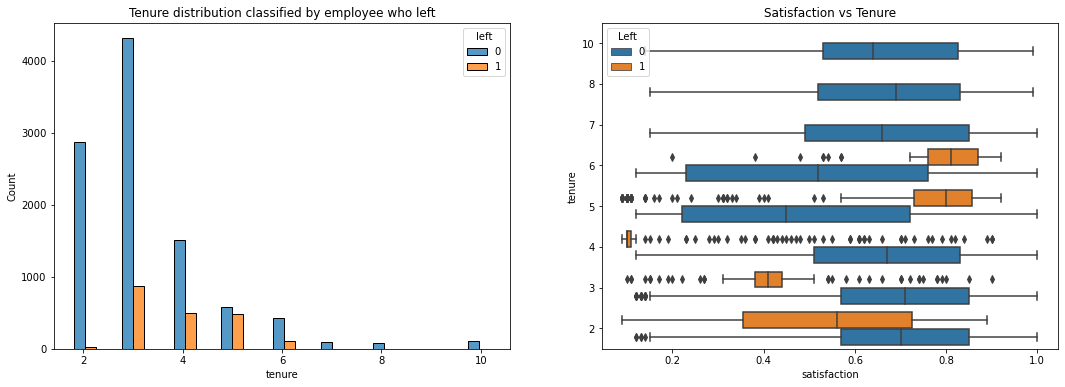

In [17]:
# PLots to analyse Tenure vs satisfaction; tenure vs left distribution
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (18,6))

# Tenure vs left distribution
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[0])
ax[0].set_title('Tenure distribution classified by employee who left', fontsize=12)


# Tenure vs Satisfaction
sns.boxplot(data=df1, x='satisfaction', y='tenure', hue='left', orient="h",
            saturation=0.75, ax=ax[1])
ax[1].legend(loc='upper left', title='Left')
ax[1].invert_yaxis()
ax[1].set_title('Satisfaction vs Tenure', fontsize=12)

plt.show()

Box Plot, 
- Satisfaction level is similar to early and long tenure employees
- There is high dissatisfaction with short tenure employees who left and high satisfaction with employees who stayed with medium tenures
- There is very low dissatisfaction level in the medium (4 year) tenure employees who left 

Histogram Plot, 
- Histogram distribution shows that only few people stay more than 5 years which might be due to promotions to higher ranks in the company

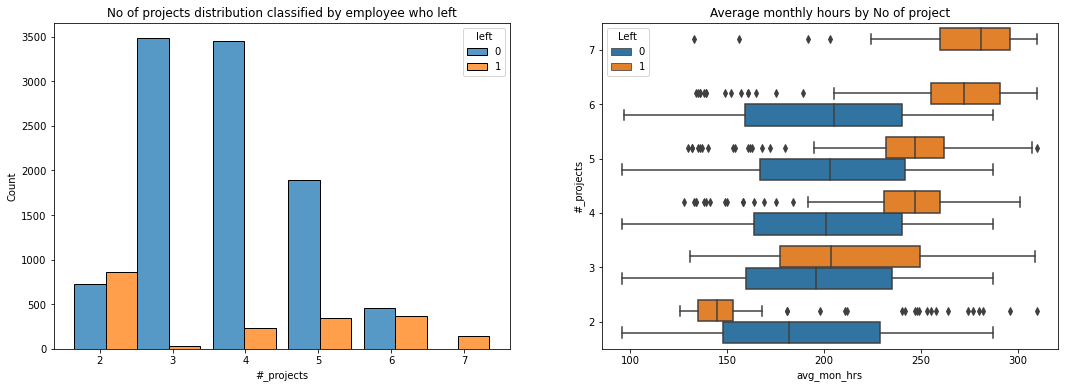

In [18]:
# plot for #_project vs avg_mon_hrs; distribution of #_projects 
fig, ax = plt.subplots(1, 2, figsize = (18,6))

# distribution of #_projects
projects_stay = df1[df1['left']==0]['#_projects']
projects_left = df1[df1['left']==1]['#_projects']
sns.histplot(data=df1, x='#_projects', hue='left', multiple='dodge', shrink=5, ax=ax[0])
ax[0].set_title('No of projects distribution classified by employee who left', fontsize=12)


# #_project vs avg_mon_hrs
sns.boxplot(data=df1, x='avg_mon_hrs', y='#_projects', hue='left', orient="h",
            saturation=0.75, ax=ax[1])
ax[1].legend(loc='upper left', title='Left')
ax[1].invert_yaxis()
ax[1].set_title('Average monthly hours by No of project', fontsize=12)

plt.show()

Based on the plots, 

**Histogram**
- Average monthly working hours is in the range 160 - 200 hrs. 
- Seems that employees who worked in 7 projects all left. Also employees with 6 projects worked more hours and but the ratio of who stayed and left is very similar. Here the mean hours of these groups between 250 - 300 hrs, indicating that they are overworked. 
- Optimal number of projects for the employees are 3 and 4, the people who left are considerably less than the one who stayed.

**Box Plots**  
Employees who left the company,   
1) Those who worked longer hours and more projects - they quit because of being overworked.  
2) Those who worked least hours and less projects - either they are fired or might have given notice to leave the company, so they were assigned fewer projects and worked lesser hours

Text(0.5, 1.0, 'Satisfaction level by average monthly work hours')

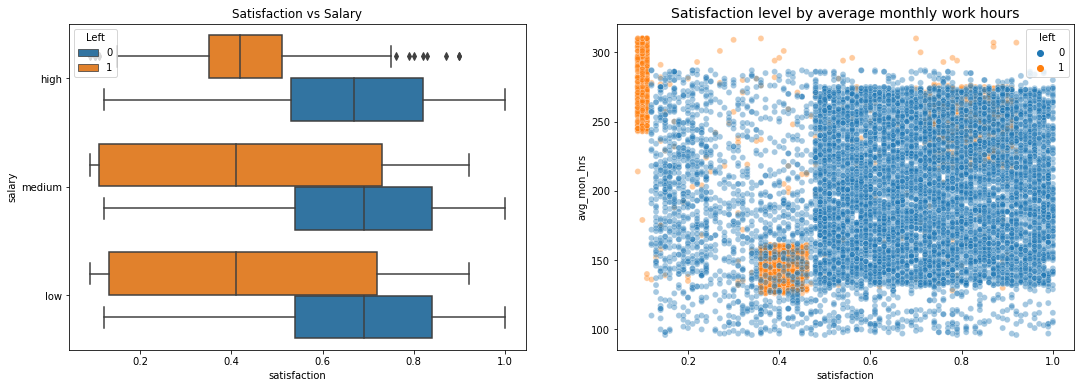

In [19]:
# Plots for satisfaction vs salary; satisfaction vs last_eval; 
fig, ax = plt.subplots(1, 2, figsize = (18,6))

# plot for satisfaction vs salary
sns.boxplot(data=df1, x='satisfaction', y='salary', hue='left', 
            orient="h", saturation=0.75, ax=ax[0])
ax[0].invert_yaxis()
ax[0].legend(loc='upper left', title='Left')
ax[0].set_title('Satisfaction vs Salary', fontsize=12)

# Plot for satisfaction vs avg_mon_hrs
sns.scatterplot(data=df1, x='satisfaction', y='avg_mon_hrs', hue='left', alpha=0.4, ax=ax[1])
ax[1].set_title('Satisfaction level by average monthly work hours', fontsize='14')

Based on the plots,

**Box plot**
- Salary has high relation with the satisfaction level. At low and medium salary level, there is very low satisfaction scores and high number of employees who left the company. 

**Scatter plot**
- Employees dissatisfaction level is very low who worked for long hours in the company and has a less than 0.5 satisfaction level aligns with employees who worked less hours which might be due to that they are fired or might have given notice to leave the company. This confirms with the previous box plots. 

Text(0.5, 1.0, 'Average monthly hours by evaluation score')

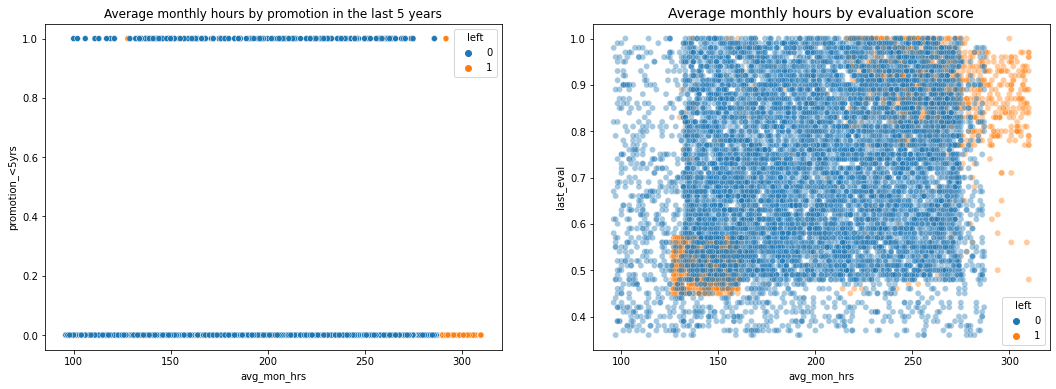

In [20]:
# Plot for avg_mon_hrs vs last_eval; avg_mon_hrs vs promotion_<5yrs
fig, ax = plt.subplots(1, 2, figsize = (18,6))

# Plot for avg_mon_hrs vs promotion_<5yrs
sns.scatterplot(data=df1, x='avg_mon_hrs', y='promotion_<5yrs', hue='left', ax=ax[0])
ax[0].set_title('Average monthly hours by promotion in the last 5 years', fontsize=12)

# Plot for avg_mon_hrs vs last_eval
sns.scatterplot(data=df1, x='avg_mon_hrs', y='last_eval', hue='left', alpha=0.4, ax=ax[1])
ax[1].set_title('Average monthly hours by evaluation score', fontsize=14)

Based on the plot,

**Avg_mon_hrs vs Promotion_<5yrs**
- All the employees who left worked long hours and not promoted for their left the company
- only few employees worked the long hours were promoted.

**avg_mon_hrs vs last_eval**
Employeed who left,
- overworked employees who worked well
- employees who worked less and with low evaluation score
- Most of the employees work more than the average monthly work hours range

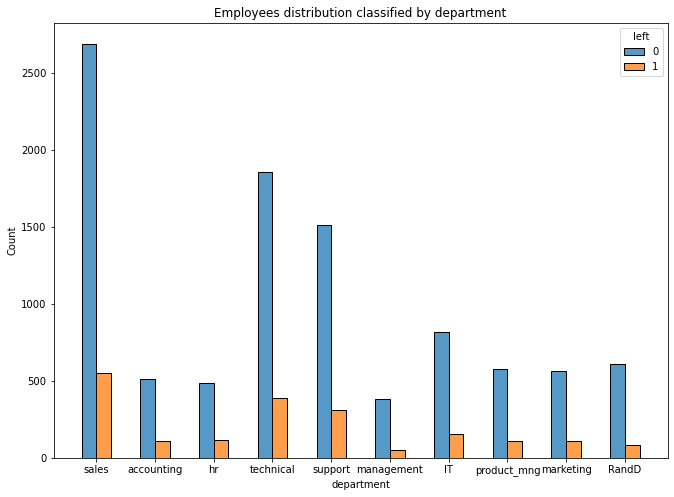

In [21]:
# Plot for distribution of employee who left by department
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.title('Employees distribution classified by department', fontsize=12)

plt.show()

Sales, Technical and Support department are the top three department where the employees left compared to the other departments 

### Insights

Key drivers of employees who left are because, 
- long working hours
- high number of projects 
- not getting a promotion for their effort
- low evaluation scores

Most of the employees are mostly burned out working long hours, more number of projects and not receiving any benefits such as promotion or higher salary. This mainly points out the poor company management and the company policies that might have to be investigated further.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

**Objective -** to analyse whether or not the employee leaves the company

### Identify the types of models most appropriate for this task.

This dependent variable has categorical values (0 & 1) which involves binary classification.

Model to use,
- Logistic regression
- Tree-based ML model

### Modeling

Add as many cells as you need to conduct the modeling process.

### Logistic Regression

Binomial logistic regression suits this objective. 

**Steps to take for the model**
- Categorical variables must be encoded as the numeric values, i.e. department and salary
    - Department is a set of category which can be encoded with dummy values 
    - Salary is hierarchial set of category, which should be encoded with ordinal values (0 - low, 1 - medium , 2 - high)

In [22]:
# Encoding the categorical into numerical 
# Copy the dataframe for the modelling
enc_df = df1.copy()

# Mapping the salary category with ordinal numbers according to hierarchy
salary_map = {'low':0, 'medium':1, 'high':2}

# Creating a new column for the salary map
enc_df['salary'] = enc_df['salary'].map(salary_map)

# Encoding the department with dummy variables
enc_df = pd.get_dummies(enc_df, drop_first=False)

enc_df.head()

,satisfaction,last_eval,#_projects,avg_mon_hrs,tenure,work_accident,left,promotion_<5yrs,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [23]:
# Removing the outliers in the tenure and saving it in a new dataframe
df_lr = enc_df[(enc_df['tenure'] >= lower_limit) & (enc_df['tenure'] <= upper_limit)]

df_lr.head().reset_index(drop=True)
df_lr.shape

(11167, 19)

### Building the Model

In [24]:
# Setting the 'y' variable
y = df_lr['left']

# Setting the 'x' variable with dropping the left column
X = df_lr.drop('left', axis=1)

In [25]:
# Split the data into training (75%) and test (25%) dataset 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, stratify=y, random_state=0)

In [26]:
# Constructing the LogReg model
log_clf = LogisticRegression(random_state=0, max_iter=500)

In [27]:
# Fitting the model
log_clf.fit(X_train,y_train)

LogisticRegression(max_iter=500, random_state=0)

In [28]:
# Use the model for the test dataset
y_pred = log_clf.predict(X_test)

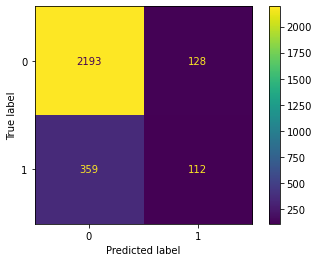

In [29]:
# Constructing a confusion matrix 
# Computing values in the matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix = log_cm, 
                                  display_labels = log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

Model accurately predicts,  
- **True Positive -** No. of people who left = 112  
- **True Negative -** No. of people who will not leave = 2193   
- **False Positive -** No. of people who will not leave but predicted will leave = 128  
- **False Negative -** No. of people who will leave but predicted will not leave = 359  

In [30]:
df_lr['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

The data shows 83% - 17% split and shows imbalance. Based on the model performance, we can check whether the data should be resampled with a bit of balance split

In [31]:
# Create classification report for logistic regression model
row_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=row_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.94      0.90      2321
    Predicted would leave       0.47      0.24      0.32       471

                 accuracy                           0.83      2792
                macro avg       0.66      0.59      0.61      2792
             weighted avg       0.79      0.83      0.80      2792



Logistic Regression Model - classification report shows, 
- Precision = 79%
- Recall = 83%
- F1 score = 80%
- Accuracy = 83%

The model shows very low scores in the objective which is the importance to predict employees who will leave.

Hence, we can try other classification model - Decision Tree and Random Forest

### Tree-based Model - Decision Tree & Random Forest

In [32]:
enc_df.head()

,satisfaction,last_eval,#_projects,avg_mon_hrs,tenure,work_accident,left,promotion_<5yrs,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [33]:
# Using the enc_df dataframe
# Setting the y variable
y = enc_df['left']

# Setting the X variable
X = enc_df.drop('left',axis=1)

# Split the data into training (75%) and test (25%) dataset 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, stratify=y, random_state=0)

### Decision Tree Model 1

In [34]:
# Instantia the decision tree model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[2, 4, 6, None],
             'min_samples_leaf': [2, 6, 3],
             'min_samples_split': [2, 5,7]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
dtree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [35]:
%%time
# Fitting the model
dtree1.fit(X_train,y_train)

CPU times: user 2.54 s, sys: 348 ms, total: 2.89 s
Wall time: 2.89 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [2, 4, 6, None],
                         'min_samples_leaf': [2, 6, 3],
                         'min_samples_split': [2, 5, 7]},
             refit='roc_auc',
             scoring={'recall', 'roc_auc', 'precision', 'f1', 'accuracy'})

In [36]:
# Check best parameters
dtree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 6, 'min_samples_split': 2}

In [37]:
# Check best AUC score on CV
dtree1.best_score_

0.9698667651120891

In [38]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [39]:
# Get all CV scores
dtree1_cv_results = make_results('Decision Tree 1 CV', dtree1, 'auc')
dtree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,Decision Tree 1 CV,0.91449,0.916279,0.915345,0.971867,0.969867


The metrics scores are very high. The model performance is very good, but decision tree model is prone to overfitting. 
Random Forest Model is performed to compare the models

### Random Forest 1 

In [40]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [41]:
%time
rf1.fit(X_train, y_train) 

CPU times: user 4 µs, sys: 3 µs, total: 7 µs
Wall time: 13.1 µs


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'recall', 'roc_auc', 'precision', 'f1', 'accuracy'})

In [42]:
# Define a path to the folder where you want to save the model
path = '/home/jovyan/work/'

In [43]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [44]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [45]:
# Write pickle
write_pickle(path, rf1, 'hr_rf1')

In [46]:
# Read pickle
rf1 = read_pickle(path, 'hr_rf1')

In [47]:
# Check best params
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [48]:
# Check best AUC score on CV
rf1.best_score_

0.9804250949807172

In [49]:
# Get all CV scores
rf1_cv_results = make_results('Random Forest 1 CV', rf1, 'auc')
results = pd.concat([rf1_cv_results,dtree1_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy,auc
0,Random Forest 1 CV,0.950023,0.915614,0.932467,0.977983,0.980425
0,Decision Tree 1 CV,0.914490,0.916279,0.915345,0.971867,0.969867


Based on the model training results, 
- Random Forest Model scores better than the Decision Tree, exception is the recall but not too significant just 0.001 lower. 
- Random Forest Model performs well than the Decision Tree and the test set can be evaluated using the Random Forest.

In [50]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [51]:
print("Train columns:", list(X_train.columns))
print("Test columns :", list(X_test.columns))

missing_cols = set(X_train.columns) - set(X_test.columns)
print("Missing in test data:", len(missing_cols))

Train columns: ['satisfaction', 'last_eval', '#_projects', 'avg_mon_hrs', 'tenure', 'work_accident', 'promotion_<5yrs', 'salary', 'department_IT', 'department_RandD', 'department_accounting', 'department_hr', 'department_management', 'department_marketing', 'department_product_mng', 'department_sales', 'department_support', 'department_technical']
Test columns : ['satisfaction', 'last_eval', '#_projects', 'avg_mon_hrs', 'tenure', 'work_accident', 'promotion_<5yrs', 'salary', 'department_IT', 'department_RandD', 'department_accounting', 'department_hr', 'department_management', 'department_marketing', 'department_product_mng', 'department_sales', 'department_support', 'department_technical']
Missing in test data: 0


In [52]:
# Get predictions on test data
rf1_test_scores = get_scores('Random Forest 1 Test', rf1, X_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,Random Forest 1 Test,0.964211,0.919679,0.941418,0.980987,0.956439


Test results are similar to the training results, which shows that the model is very good. The model's performance will be similar when new unseen data is fitted, as the test data was used only for this model. 


Round 1 Models included all the variables as features for the model prediction. For the Round 2 Models, Feature engineering will be used to customize the data for improving the model. 

### Feature Engineering

What can be engineered in the dataset, 
- Satisfaction level cannot be reported for all the employees. So, dropping it would be an option
- Average monthly hours might have data leakage, as it might be recorded after the employees gives notice to resign or company has given the notice to leave. So, maybe engineering this variable to a new variable as overworked might help improve the models prediction

In [53]:
# Drop `satisfaction_level` and save resulting dataframe in new variable
df2 = enc_df.drop('satisfaction', axis=1)

# Display first few rows of new dataframe
df2.head()

,last_eval,#_projects,avg_mon_hrs,tenure,work_accident,left,promotion_<5yrs,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [54]:
# Create `overworked` column. For now, it's identical to average monthly hours.
df2['overworked'] = df2['avg_mon_hrs']

# Inspect max and min average monthly hours values
print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

Max hours: 310
Min hours: 96


Assuming the 40 hrs job/per week with two weeks vacation policy, 
Average working hours per month = 40 hours * 50 weeks / 12 months = 166.67 hours

**Overworked can be defined as working hours more than 175 hours per month on average.**

In [55]:
# Define `overworked` as working > 175 hrs/week
df2['overworked'] = (df2['overworked'] > 175).astype(int)

# Display first few rows of new column
df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

In [56]:
# Drop the `average_monthly_hours` column
df2 = df2.drop('avg_mon_hrs', axis=1)

# Display first few rows of resulting dataframe
df2.head()

,last_eval,#_projects,tenure,work_accident,left,promotion_<5yrs,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [57]:
# Isolate the outcome variable
y = df2['left']

# Select the features
X = df2.drop('left', axis=1)

# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

### Decision Tree 2

In [58]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
dtree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [59]:
%%time
dtree2.fit(X_train, y_train)

CPU times: user 2.79 s, sys: 4.64 ms, total: 2.79 s
Wall time: 2.79 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'recall', 'roc_auc', 'precision', 'f1', 'accuracy'})

In [60]:
# Check best params
dtree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [61]:
# Check best AUC score on CV
dtree2.best_score_

0.9586752505340426

In [62]:
# Get all CV scores
dtree2_cv_results = make_results('Decision Tree 2 CV', dtree2, 'auc')
results = pd.concat([dtree1_cv_results,dtree2_cv_results,rf1_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy,auc
0,Decision Tree 1 CV,0.914490,0.916279,0.915345,0.971867,0.969867
0,Decision Tree 2 CV,0.856693,0.903553,0.878882,0.958523,0.958675
0,Random Forest 1 CV,0.950023,0.915614,0.932467,0.977983,0.980425


### Random Forest 2

In [63]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [64]:
%%time
# Fitting the Model
rf2.fit(X_train, y_train)

CPU times: user 15min 31s, sys: 2.16 s, total: 15min 33s
Wall time: 15min 34s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'recall', 'roc_auc', 'precision', 'f1', 'accuracy'})

In [65]:
# Write pickle
write_pickle(path, rf2, 'hr_rf2')

In [66]:
# Read in pickle
rf2 = read_pickle(path, 'hr_rf2')

In [67]:
# Check best params
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [68]:
# Check best AUC score on CV
rf2.best_score_

0.9648100662833985

In [69]:
# Get all CV scores
rf2_cv_results = make_results('Random Forest 2 CV', rf2, 'auc')
results = pd.concat([dtree1_cv_results,dtree2_cv_results,rf1_cv_results,rf2_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy,auc
0,Decision Tree 1 CV,0.914490,0.916279,0.915345,0.971867,0.969867
0,Decision Tree 2 CV,0.856693,0.903553,0.878882,0.958523,0.958675
0,Random Forest 1 CV,0.950023,0.915614,0.932467,0.977983,0.980425
0,Random Forest 2 CV,0.866758,0.878754,0.872407,0.957411,0.964810


Based on the training results for the two rounds of Decision Tree and Random Forest Model, 

- Random Forest model performs well with ROC-AUC score as the deciding metric. So Random Forest model is the winning model and the test can now be used for prediction

In [70]:
# Get predictions on test data
rf2_test_scores = get_scores('Random Forest 2 Test', rf2, X_test, y_test)
test_results = pd.concat([rf1_test_scores, rf2_test_scores], axis=0)
test_results

,model,precision,recall,f1,accuracy,AUC
0,Random Forest 1 Test,0.964211,0.919679,0.941418,0.980987,0.956439
0,Random Forest 2 Test,0.870406,0.903614,0.886700,0.961641,0.938407


Plotting a Confusion Matrix to visualize the model's predictions on the test set

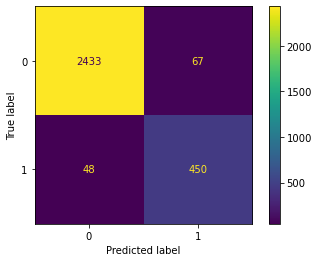

In [71]:
# Generate array of values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot(values_format='');

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

In this case, Model predicts more false positives than false negatives, which means that the employees are at risk of getting fired or leaving voluntarily but that is not the case. Although it still is a strong model for predicting the employees that stay

### Plotting the Decision Tree

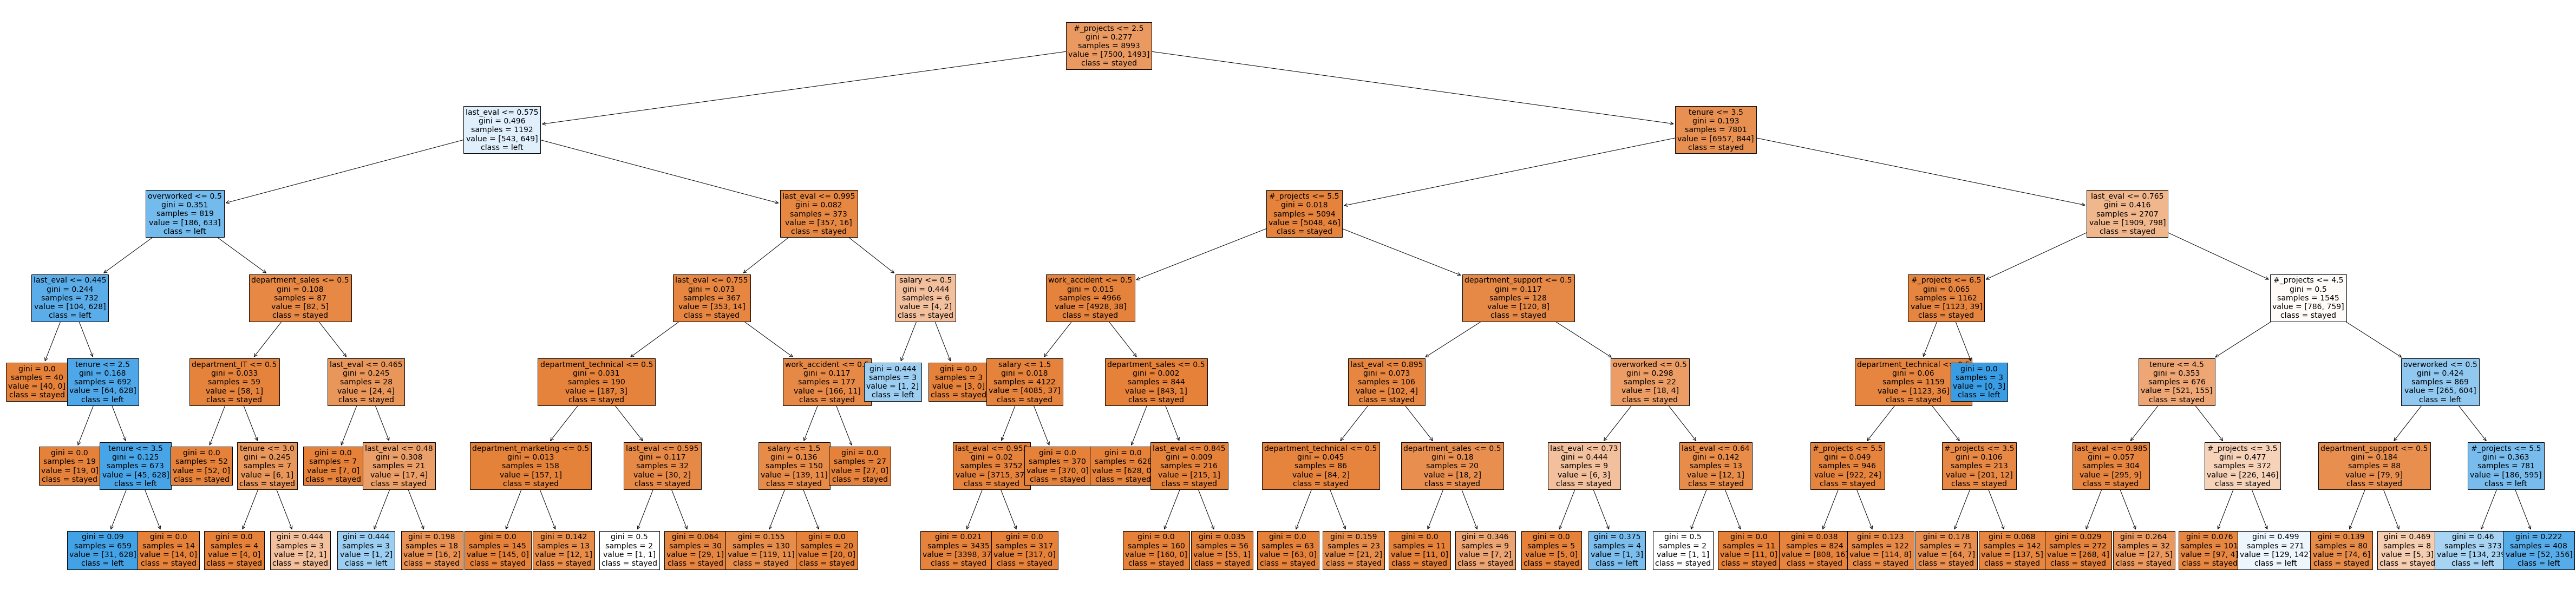

In [72]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(dtree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

#### Decision tree feature importance

In [73]:
# tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
dtree2_importances = pd.DataFrame(dtree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
dtree2_importances = dtree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
dtree2_importances = dtree2_importances[dtree2_importances['gini_importance'] != 0]
dtree2_importances

,gini_importance
last_eval,0.343958
#_projects,0.343385
tenure,0.215681
overworked,0.093498
department_support,0.001142
salary,0.000910
department_sales,0.000607
department_technical,0.000418
work_accident,0.000183
department_IT,0.000139


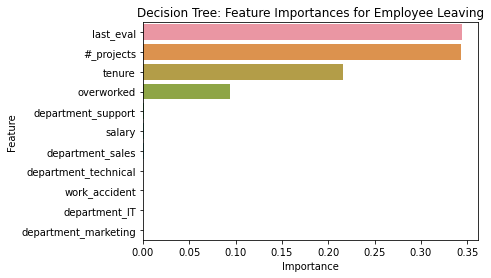

In [74]:
sns.barplot(data=dtree2_importances, x="gini_importance", y=dtree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

Feature importance plot for the decision tree model shows that `last_evaluation`, `#_project`, `tenure`, and `overworked` have the importance from high to the least which helps in predicting the outcome variable 'employee left'

#### Random forest feature importance

Now, plot the feature importances for the random forest model.

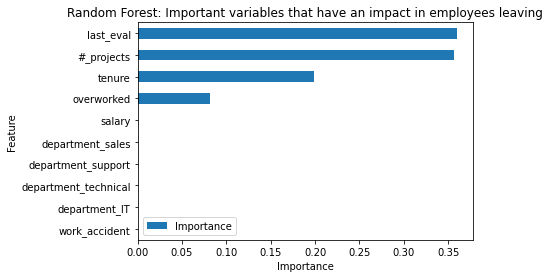

In [75]:
# Get feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Important variables that have an impact in employees leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

Feature importance plot for the Random Forest is the same as the Decision Tree model - feature importance plot

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders

✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

**Logistic Regression Model**

Model's performance on the test set, 
- Precision = 79%
- Recall = 83%
- F1 score (weighted average) = 80%
- Accuracy = 83%
The model shows very low scores in the objective which is the importance to predict employees who will leave.

**Tree-based Machine Learning**

After the feature engineering, on the test set,  				

Decision Tree model performs with, Precision = 86%; Recall = 90%; F1-Score = 88%; Accuracy = 96%; AUC = 96%
Random Forest model performs with, Precision = 87%; Recall = 90%; F1-Score = 88%; Accuracy = 96%; AUC = 93%

Random Forest Model outperformed the decision tree model.

### Conclusion, Recommendations, Next Steps

With the initial assessment, EDA and Visualization, the employees are overworked due to the poor company management. This is also confirmed with the model and feature importance

**Following recommendations could be presented to the stakeholders for retaining the employees:**
- Limiting or capping the number of projecs that employees can work on.
- Investigating the dissatisfaction of the four year tenure employeees
- Gratification or providing benefits for the employees working longer hours 
- Informing the employees about the overtime work policies/
- Evaluation scores must be defined and measured on a proportionate scale to be balanced for rewarding employees who work hard or put in more effort.

**Next Steps**
- Having a strucuted method for getting employees evaluation and satisfaction score before the employee leaves the company, as this might tend to data leakage. This might help in mitigating this issues and will help improve the model's performance

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.